***
# <font color="grey">Problem Sheet 2 Part B - Solutions</font>
***
$\newcommand{\vct}[1]{\mathbf{#1}}$
$\newcommand{\mtx}[1]{\mathbf{#1}}$
$\newcommand{\e}{\varepsilon}$
$\newcommand{\norm}[1]{\|#1\|}$
$\newcommand{\minimize}{\text{minimize}\quad}$
$\newcommand{\maximize}{\text{maximize}\quad}$
$\newcommand{\subjto}{\quad\text{subject to}\quad}$
$\newcommand{\R}{\mathbb{R}}$
$\newcommand{\trans}{T}$
$\newcommand{\ip}[2]{\langle {#1}, {#2} \rangle}$
$\newcommand{\zerovct}{\vct{0}}$
$\newcommand{\diff}[1]{\mathrm{d}{#1}}$

### Solution to Problem 2.4

In [28]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt

In [29]:
# The following implementations of Newton's method return the whole computed trajectory for analysis purposes

def newton1(f, df, ddf, x0, tol, maxiter=100):
    """
    Newton's method with stopping criteria (a)
    """
    x = np.vstack((x0+2*tol*np.ones(x0.shape),x0)).transpose()
    i = 1
    while ( la.norm(x[:,i]-x[:,i-1]) > tol ) and ( i < maxiter ):
        grad = df(x[:,i])
        hess = ddf(x[:,i])
        z = la.solve(hess,grad)
        xnew = x[:,i]-z
        x = np.concatenate((x,xnew.reshape(x0.shape)), axis=1)
        i += 1
    return x[:,1:]

def newton2(f, df, ddf, x0, tol, maxiter=100):
    """
    Newton's method with stopping criteria (b)
    """
    x = np.vstack((x0+2*tol*np.ones(x0.shape),x0)).transpose()
    i = 1
    while ( la.norm(df(x[:,i])) > tol ) and ( i < maxiter ):
        grad = df(x[:,i])
        hess = ddf(x[:,i])
        z = la.solve(hess,grad)
        xnew = x[:,i]-z
        x = np.concatenate((x,xnew.reshape(x0.shape)), axis=1)
        i += 1
    return x[:,1:]

def newton3(f, df, ddf, x0, tol, maxiter=100):
    """
    Newton's method with stopping criteria (c)
    """
    x = np.vstack((x0+2*tol*np.ones(x0.shape),x0)).transpose()
    i = 1
    while ( i < maxiter ):
        grad = df(x[:,i])
        hess = ddf(x[:,i])
        z = la.solve(hess,grad)
        xnew = x[:,i]-z
        x = np.concatenate((x,xnew.reshape(x0.shape)), axis=1)
        i += 1
    return x[:,1:]

In [30]:
def f(x):
    return np.array((x-1)**6)
    
def df(x):
    return np.array([6*(x-1)**5])
    
def ddf(x):
    return np.array([[30*(x-1)**4]])

In [31]:
x0 = np.array([10.]).reshape((1,1))
tol = 1e-6

x1 = newton1(f, df, ddf, x0, tol)
x2 = newton2(f, df, ddf, x0, tol)
x3 = newton3(f, df, ddf, x0, tol)

In [32]:
print "Method (a):", len(x1[0]), "iterations and solution", x1[0,-1]
print "Method (b):", len(x2[0]), "iterations and solution", x2[0,-1]
print "Method (c):", len(x3[0]), "iterations and solution", x3[0,-1]

Method (a): 67 iterations and solution 1.00000361561
Method (b): 25 iterations and solution 1.04250129835
Method (c): 100 iterations and solution 1.00000000229


While (b) was the fastest, the accuracy was not so great. Stopping criterium (a) is reasonable, since in view of the quadratic convergence, the inequality

\begin{equation*}
 \norm{\vct{x}_{k+1}-\vct{x}_k}\geq \norm{\vct{x}_k-\vct{x}^*}-\norm{\vct{x}_{k+1}-\vct{x}^*} \geq \norm{\vct{x}_k-\vct{x}^*}-M\norm{\vct{x}_{k}-\vct{x}^*}^2
\end{equation*}

shows that the difference of successive iterates gives a good bound on the error. Criterium (b) is problematic, as the function can have a very flat slope while still being far away from the minimizer, as the example shows.

This issue is related to the notion of conditioning of the function $f$. Criterium (c) always has the same running time, and 100 iterations would normally be more than enough for Newton's method. However, this is a very pessimistic bound, and takes much longer than necessary.

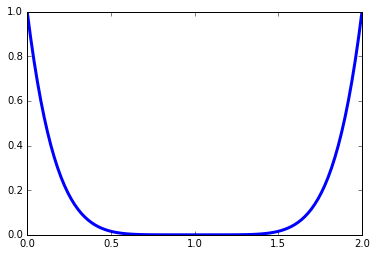

In [35]:
xx = np.linspace(0,2,100)
yy = f(xx)
plt.plot(xx, yy, linewidth = 3)
plt.show()

### Solution to Problem 2.5

In [18]:
# Define the relevant methods

def newton(f, df, ddf, x0, tol, maxiter=100):
    """
    Newton's method with stopping criteria (a)
    """
    x = np.vstack((x0+2*tol*np.ones(x0.shape),x0)).transpose()
    i = 1
    while ( la.norm(x[:,i]-x[:,i-1]) > tol ) and ( i < maxiter ):
        grad = df(x[:,i])
        hess = ddf(x[:,i])
        z = la.solve(hess,grad)
        xnew = x[:,i]-z
        x = np.concatenate((x,xnew.reshape((len(x0), 1))), axis=1)
        i += 1
    return x[:,1:]

def graddesc_bt(f, df, x0, tol, maxiter=100, rho=0.5, c=0.1):
    """
    Gradient descent with backtracking
    """
    x = np.vstack((x0+2*tol*np.ones(x0.shape),x0)).transpose()
    i = 1
    while ( la.norm(x[:,i]-x[:,i-1]) > tol ) and ( i < maxiter ):
        p = -df(x[:,i])
        # Start backtracking
        alpha = 1
        xnew = x[:,i] + alpha*p
        while (f(xnew) >= f(x[:,i]) + alpha*c*np.dot(p, df(x[:,i]))):
            alpha = alpha*rho
            xnew = x[:,i] + alpha*p
        x = np.concatenate((x,xnew.reshape((len(x0),1))), axis=1)
        i += 1
    return x[:,1:]

def graddesc_co(f, df, x0, tol, maxiter=100):
    """
    Gradient descent with constant step length
    """
    alpha = 0.1
    x = np.vstack((x0+2*tol*np.ones(x0.shape),x0)).transpose()
    i = 1
    while ( la.norm(x[:,i]-x[:,i-1]) > tol ) and ( i < maxiter ):
        r = df(x[:,i])
        xnew = x[:,i] - alpha*r
        x = np.concatenate((x,xnew.reshape((len(x0),1))), axis=1)
        i += 1
    return x[:,1:]

In [19]:
# Define the relavant functions
def f(x):
    return np.exp(x[0]+3*x[1]-0.1)+np.exp(x[0]-3*x[1]-0.1)+np.exp(-x[0]-0.1)

def df(x):
    return np.array([np.exp(x[0]+3*x[1]-0.1)+np.exp(x[0]-3*x[1]-0.1)-np.exp(-x[0]-0.1), 
                     3*np.exp(x[0]+3*x[1]-0.1)-3*np.exp(x[0]-3*x[1]-0.1)])

def ddf(x):
    return np.array([[np.exp(x[0]+3*x[1]-0.1)+np.exp(x[0]-3*x[1]-0.1)+np.exp(-x[0]-0.1), 
                     3*np.exp(x[0]+3*x[1]-0.1)-3*np.exp(x[0]-3*x[1]-0.1)], 
                     [3*np.exp(x[0]+3*x[1]-0.1)-3*np.exp(x[0]-3*x[1]-0.1),
                    9*np.exp(x[0]+3*x[1]-0.1)+9*np.exp(x[0]-3*x[1]-0.1)]])

In [20]:
tol = 1e-6
x0 = np.array([-1.,0.7])

# Run the three methods
xbt = graddesc_bt(f, df, x0, tol)
xco = graddesc_co(f, df, x0, tol)
xn = newton(f, df, ddf, x0, tol)

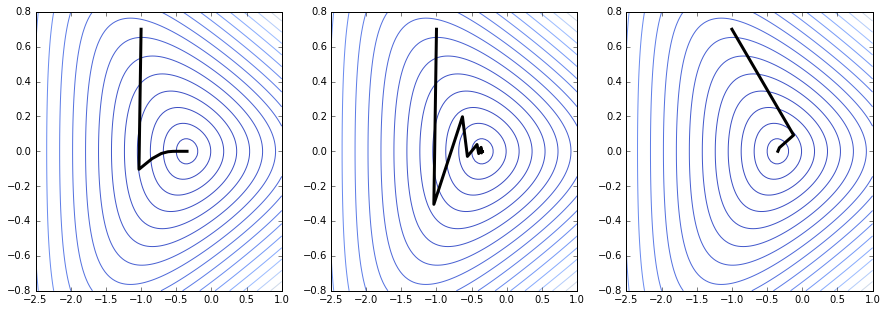

In [21]:
# Get a list of values for specifying the level sets
xvals = np.array([[np.linspace(-4,-0.5,20)], [np.zeros(20)]])
yvals = list(reversed(f(xvals)[0]))

# Create a meshgrid and a contour plot
xx = np.linspace(-2.5,1,100)
yy = np.linspace(-0.8,0.8,100)
X, Y = np.meshgrid(xx, yy)
# The construction inside looks odd: we want to transform the set of input pairs given
# by the meshgrid into a 2 x n array of values that we can apply f to (calling f on such
# an array will apply the function f to each column)
Z = f(np.dstack((X,Y)).reshape((X.size, 2)).transpose())
# the result of applying f is a long list, but we want a matrix
Z = Z.reshape(X.shape)

% matplotlib inline
cmap = plt.cm.get_cmap("coolwarm")

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

#ax[0].subplot(1,3,1)
ax[0].contour(X, Y, Z, yvals, cmap = cmap)
ax[0].plot(xco[0,:], xco[1,:], color='black', linewidth=3)


#plt.subplot(1,3,2)
ax[1].contour(X, Y, Z, yvals, cmap = cmap)
ax[1].plot(xbt[0,:], xbt[1,:], color='black', linewidth=3)


#plt.subplot(1,3,3)
ax[2].contour(X, Y, Z, yvals, cmap = cmap)
ax[2].plot(xn[0,:], xn[1,:], color='black', linewidth=3)

plt.show()
#plt.savefig('threemethods.png')

In [22]:
print "The number of iterations with constant step length is:", len(xco[0,:])
print "The number of iterations with backtracking is:", len(xbt[0,:])
print "The number of iterations with Newton's method is:", len(xn[0,:])

The number of iterations with constant step length is: 44
The number of iterations with backtracking is: 28
The number of iterations with Newton's method is: 6


### Solution to Problem 2.6

(a) The verification follows from applying the definition of convexity.

(b) We minimize the function using Newton's method with starting point $(a,b)=(0.5,0.5)$ and tolerance $10^{-6}$. The number of iterations is 6 and the solution is $(a,b) = (1.724,--4.434)$. Plotting the probability of passing the exam as a function of the number of preparation hours, with the parameters $(a,b)$, gives the curve computed below.

In [23]:
u = np.array([0.5,1.,1.5,2.5,3.,2.,3.,3.5,4.,4.5,4.75,5.])
y = np.array([0,  0,0,  0,  0,1,1,1,  1,1,  1,   1])

def f(x):
    a, b = x[0], x[1]
    return -np.sum(a*u[5:]+b*np.ones(7))+np.sum(np.log(1+np.exp(a*u+b*np.ones(12))))

def df(x):
    a, b = x[0], x[1]
    return np.array([-np.sum(u[5:])+np.sum(u*np.exp(a*u+b*np.ones(12))/(1+np.exp(a*u+b*np.ones(12)))),
                    -7+np.sum(np.exp(a*u+b*np.ones(12))/(1+np.exp(a*u+b*np.ones(12))))])

def ddf(x):
    a, b = x[0], x[1]
    return np.array([[np.sum( (u*np.exp(a*u+b*np.ones(12)))**2/(1+np.exp(a*u+b*np.ones(12)))**2 ), 
                      np.sum( (u*np.exp(a*u+b*np.ones(12)))*(np.ones(12)-u+np.exp(a*u+b*np.ones(12)))/(1+np.exp(a*u+b*np.ones(12)))**2 )], 
                     [np.sum( (u*np.exp(a*u+b*np.ones(12)))*(np.ones(12)-u+np.exp(a*u+b*np.ones(12)))/(1+np.exp(a*u+b*np.ones(12)))**2 ), 
                      np.sum( (np.exp(a*u+b*np.ones(12)))**2/(1+np.exp(a*u+b*np.ones(12)))**2 )]])

In [24]:
x0 = np.array([0.5, 0.5])
tol = 1e-8

x = newton(f, df, ddf, x0, tol, 100)
a, b = x[0,-1], x[1,-1]

print "The parameters are:", a, b

def prob(t):
    return np.exp(a*t+b)/(1+np.exp(a*t+b))

tt = np.linspace(0,5,100)
yy = prob(tt)

The parameters are: 1.723719255 -4.43435773691


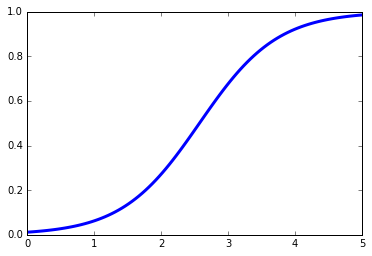

In [25]:
% matplotlib inline
plt.plot(tt,yy,linewidth=3)
plt.show()